In [15]:
import torch
from ssda.models.vae_model import VAE
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from ssda.models.vae_model import VAE

encoder_hidden_size = 100
decoder_hidden_size = 100

type = "patients"
patients_vae = VAE()
patients_vae.load_results_from_directory(experiment_name="vae",
                                         experiment_type="porous",
                                         experiment_indentifier=f"encoder_{encoder_hidden_size}_decoder_{decoder_hidden_size}_type_{type}")

type = "simulations"
simulations_vae = VAE()
simulations_vae.load_results_from_directory(experiment_name="vae",
                                         experiment_type="porous",
                                         experiment_indentifier=f"encoder_{encoder_hidden_size}_decoder_{decoder_hidden_size}_type_{type}")

In [9]:
simulations_encoded_in_patients_full = []
simulations_encoded_in_simulations_full = []

patients_encoded_in_patients_full = []
patients_encoded_in_simulations_full = []

for databatch in simulations_vae.dataloader.train():
    simulations_encoded_in_patients,mu,logavr = patients_vae.encoder(databatch["images"].float())
    simulations_encoded_in_simulations,mu,logavr = simulations_vae.encoder(databatch["images"].float())

    simulations_encoded_in_patients_full.append(simulations_encoded_in_patients.detach().numpy())
    simulations_encoded_in_simulations_full.append(simulations_encoded_in_simulations.detach().numpy())

for databatch in patients_vae.dataloader.train():
    patients_encoded_in_patients,mu,logavr = patients_vae.encoder(databatch["images"].float())
    patients_encoded_in_simulations,mu,logavr = simulations_vae.encoder(databatch["images"].float())

    patients_encoded_in_patients_full.append(patients_encoded_in_patients.detach().numpy())
    patients_encoded_in_simulations_full.append(patients_encoded_in_simulations.detach().numpy())

In [14]:
simulations_encoded_in_patients_full = np.vstack(simulations_encoded_in_patients_full)
simulations_encoded_in_simulations_full = np.vstack(simulations_encoded_in_simulations_full)
patients_encoded_in_patients_full = np.vstack(patients_encoded_in_patients_full)
patients_encoded_in_simulations_full = np.vstack(patients_encoded_in_simulations_full)

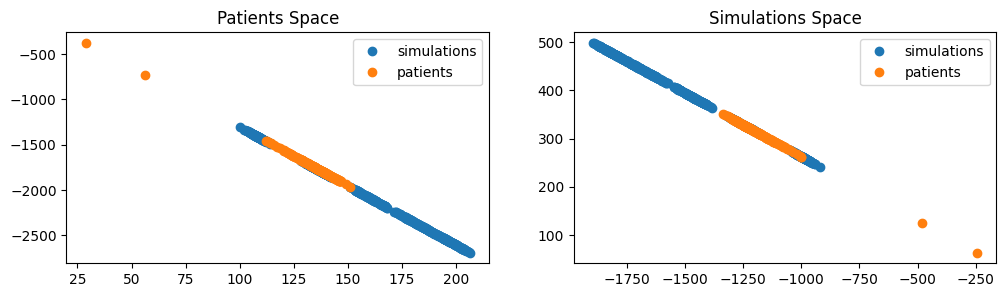

In [31]:
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(12,3))
ax0 = ax[0]
ax1 = ax[1]

ax0.set_title("Patients Space")
ax0.plot(simulations_encoded_in_patients_full[:,0],simulations_encoded_in_patients_full[:,1],"o",label="simulations")
ax0.plot(patients_encoded_in_patients_full[:,0],patients_encoded_in_patients_full[:,1],"o",label="patients")
ax0.legend(loc="best")

ax1.set_title("Simulations Space")
ax1.plot(simulations_encoded_in_simulations_full[:,0],simulations_encoded_in_simulations_full[:,1],"o",label="simulations")
ax1.plot(patients_encoded_in_simulations_full[:,0],patients_encoded_in_simulations_full[:,1],"o",label="patients")
ax1.legend(loc="best")

plt.savefig("Share Projections.png")